# KMeans Clustering for Isihara Test

## Import Image

In [0]:
import os
img_dir = '/tmp/nst'
if not os.path.exists(img_dir):
    os.makedirs(img_dir)
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Ishihara_9.png/800px-Ishihara_9.png
!wget --quiet -P /tmp/nst/  https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Ishihara_11.PNG/800px-Ishihara_11.PNG

## Import Library

We use Image to load image. pyplot to plot image from array. numpy to change image into an array and change the shape. KMeans as learning model. 

In [0]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

%matplotlib inline

## Convert RGBA to RGB
Use this function if the image has alpha channel(ie. png format). If your image already has RGB channel, use this line:

```
Image.open(img_path)
```



In [0]:
def rgba_to_rgb(image):
    """
    Source: http://stackoverflow.com/a/9459208/284318
    """
    color=(255, 255, 255)
    image.load()  # needed for split()
    background = Image.new('RGB', image.size, color)
    background.paste(image, mask=image.split()[3])  # 3 is the alpha channel
    return background

In [0]:
img_path = '/tmp/nst/800px-Ishihara_9.png'
img_path2 = '/tmp/nst/800px-Ishihara_11.PNG'
image = rgba_to_rgb(Image.open(img_path2))

## Flatten Image
change 2D image into an 1D array with 3 channels

In [0]:
img_array = np.array(image)
shape = img_array.shape

img_flatten = np.reshape(img_array,(shape[0]*shape[1],shape[2]))

## Normalization

In [0]:
img_flatten = img_flatten/255

## Create Learning Model
We set number of clusters to 3; 2 clusters for image and 1 cluster for background.

In [0]:
clusters = 3
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(img_flatten)
y_kmeans = kmeans.predict(img_flatten)

## Generate Array using Centroids from Model
Generate array (same size as original image) with centroids as values. We assign centroid that corresponding cluster from original image.

In [0]:
centroid = kmeans.cluster_centers_
cluster_array = np.reshape(y_kmeans, (shape[0], shape[1]))
img_centroid = img_array.copy()
for c in range(clusters):
  img_centroid[cluster_array==c] = centroid[c] * 255 # denormalize

## Show the result
Left   : original image
Middle : generated image based on cluster
Right  : generated image based on centroid

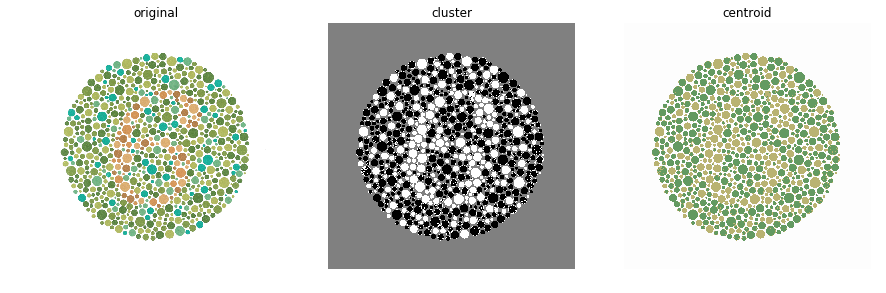

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(image)
plt.title("original")
plt.axis('off')

plt.subplot(132)
plt.imshow(cluster_array, cmap='gray', vmin=0, vmax=clusters-1)
plt.title("cluster")
plt.axis('off')

plt.subplot(133)
plt.imshow(img_centroid)
plt.title("centroid")
plt.axis('off')

plt.show()